# IQR outlier detection
## Overview
The IQR outlier detection is a **concept in statistics to remove anomalies/outliers** in your data.  
Here is why IQR may match your requirements for your data science project:
- **Simple** to implement.
- **Non-parametric** outlier detection. (If left at its default value K=1.5)
- **One dimensional** feature space. 

The formula is:  
$$x>q1-k*iqr$$ and $$x<q3+k*iqr$$
<u>with:</u>  
- **q1** is the **first quartile** of the data. (25% of the data are between the minimum and q1). 
- **q3** is the **third quartile** of the data. (75% of the data are between the minimum and q3).
- **iqr** is the **Inter-Quartile Range**. $$iqr=q3-q1$$ 
- <b>k</b> is the **coefficient** applied to iqr. $$k>0$$  

<u>Let's see how IQR detection works with a box plot:</u>
![IQR detection schema.](./../doc/img/iqr_schema.svg)
  
<u>Here is the main thing to remember:</u>
- Every value under $q1-k*iqr$ is considered as outliers.
- Every value over $q3+k*iqr$ is considered as outliers.
- If **k increase**, outliers range decreased. Then, there is **less** value considered as an **outlier**.
- If **k decrease**, outliers range increased. Then, there is **more** value considered as an **outlier**.  

<u>Which value uses for K ?</u>  
For a perfect Gaussian distribution of your data. The best value is **k=1.5**.  
But, according to **your data** or **your use case**, this value may be adapted.  


<div align="center">
  <img src="./../doc/img/iqr_source_wiki.png" alt="IQR wikipedia" width="50%"/>  
  <a href="https://en.wikipedia.org/wiki/Interquartile_range"  align="center">Source image: Wikipedia</a></li>  
</div>

## Practice (with pandas)

In [ ]:
import sys
# go to project dir you can check 
sys.path.append("../..") 
from iqr_detection.utils.plot import display_multiple_df
from iqr_detection.utils.generate_outliers import generate_outliers_1d
%matplotlib notebook

### Input
First, we generate a pandas Dataframe as dataset to apply the outlier detection model.  

In [11]:
data_gaussian = generate_outliers_1d(how="gaussian", output_format="pandas")
data_extreme = generate_outliers_1d(how="extreme", output_format="pandas")
data_gauss_ext = generate_outliers_1d(how="gaussian+extreme", output_format="pandas")

Let's see how the data looks like.

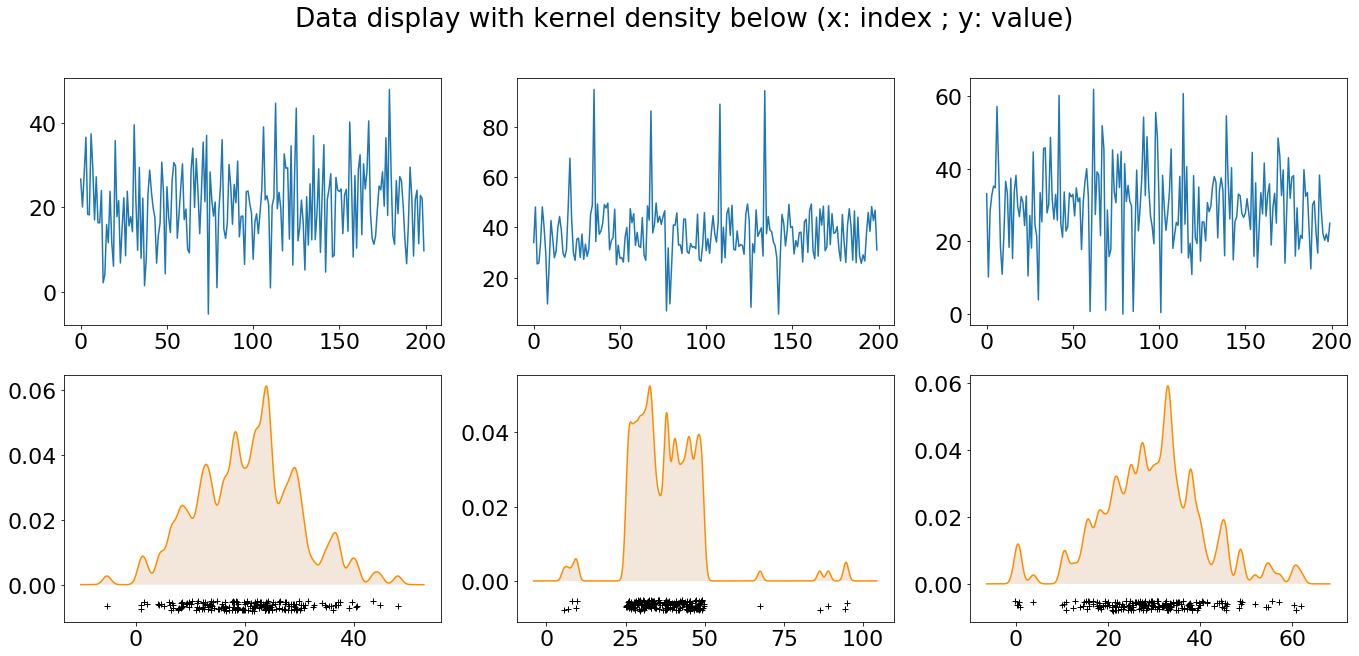

In [12]:
display_multiple_df([data_gaussian, data_extreme, data_gauss_ext])

<u>OBS:</u> Each dataset has a different data distribution.

Now, we define the **main function to apply the IQR detection**:

In [13]:
def iqr_detection(df_x, k=1.5):
    """
    Process IQR outlier detection. The input must be an one dimensional feature space.
    To adjust IQR detection, please change 'k' (k must always be >=0).

    :param df_x: (pd.Series or pd.DataFrame).
    :param k: (int) K parameter in the IQR outlier detection.
    :return: (pd.Series) Boolean series.
        True: The value is an outlier
        False: The value is not an outlier
    """
    q1 = df_x.quantile(0.25).values[0]
    q3 = df_x.quantile(0.75).values[0]
    iqr = q3 - q1
    return df_x.apply(lambda x: (x > q3+k*iqr) | (x < q1-k*iqr))

The IQR method is applied to each dataset:

In [14]:
data_gaussian["is_outlier"] = iqr_detection(data_gaussian)
data_extreme["is_outlier"] = iqr_detection(data_extreme)
data_gauss_ext["is_outlier"] = iqr_detection(data_gauss_ext)

Here we remove all outliers:

In [15]:
gaussian_without_outliers = data_gaussian[~data_gaussian["is_outlier"]].drop(columns="is_outlier")
extreme_without_outliers = data_extreme[~data_extreme["is_outlier"]].drop(columns="is_outlier")
gauss_ext_without_outliers = data_gauss_ext[~data_gauss_ext["is_outlier"]].drop(columns="is_outlier")

Here we keep only outliers:

In [16]:
gaussian_outliers = data_gaussian[data_gaussian["is_outlier"]].drop(columns="is_outlier")
extreme_outliers = data_extreme[data_extreme["is_outlier"]].drop(columns="is_outlier")
gauss_ext_outliers = data_gauss_ext[data_gauss_ext["is_outlier"]].drop(columns="is_outlier")

Then, we display each **dataset separated from their outliers** to see the result.

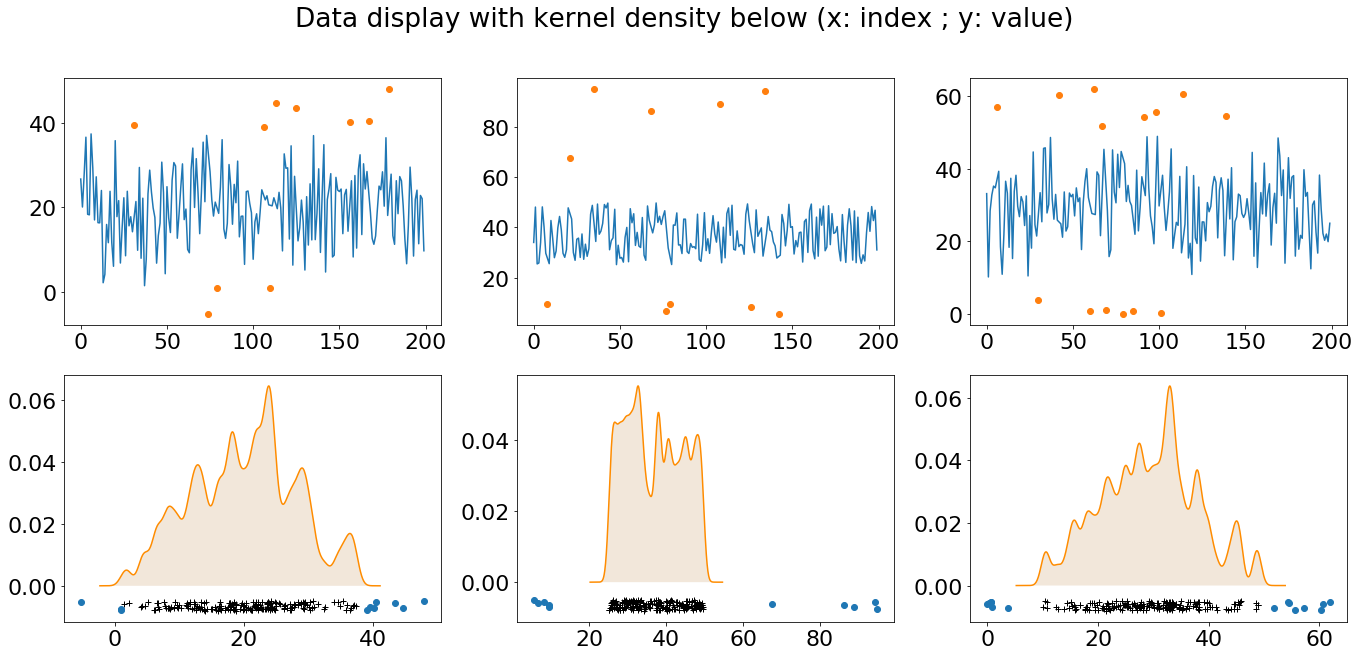

In [17]:
display_multiple_df([gaussian_without_outliers, extreme_without_outliers, gauss_ext_without_outliers],
                    outliers_data_list=[gaussian_outliers, extreme_outliers, gauss_ext_outliers])

I hope you enjoy this page about IQR outlier detection.